# FlameStream workers scalability comparision

In [19]:
require(data.table)

Loading required package: data.table


In [58]:
fl.10w <- tail(scan("fl-10w.data", sep = ","), -200) / 1e6
fs.10w.old <- tail(scan("old-redo/fs-10w-1000.data", sep = ","), -200) / 1e6
fs.10w <- tail(scan("fs-10w-2.data", sep = ","), -200) / 1e6
fs.10w.sep <- tail(scan("fs-10w-sepacker.data", sep = ","), -200) / 1e6
fs.10w.hb <- tail(scan("fs-10w-hb.data", sep = ","), -200) / 1e6

In [61]:
summary(fl.10w)
summary(fs.10w.old)
summary(fs.10w)
summary(fs.10w.sep)
summary(fs.10w.hb)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.271  15.642  28.446  40.829  51.532 375.657 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.845  30.008  39.892  55.653  68.513 347.070 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.463  30.433  78.602 133.428 181.559 896.572 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   3.002   33.566   82.966  165.100  194.077 1640.217 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   2.572   30.455   78.313  136.601  181.887 1068.959 

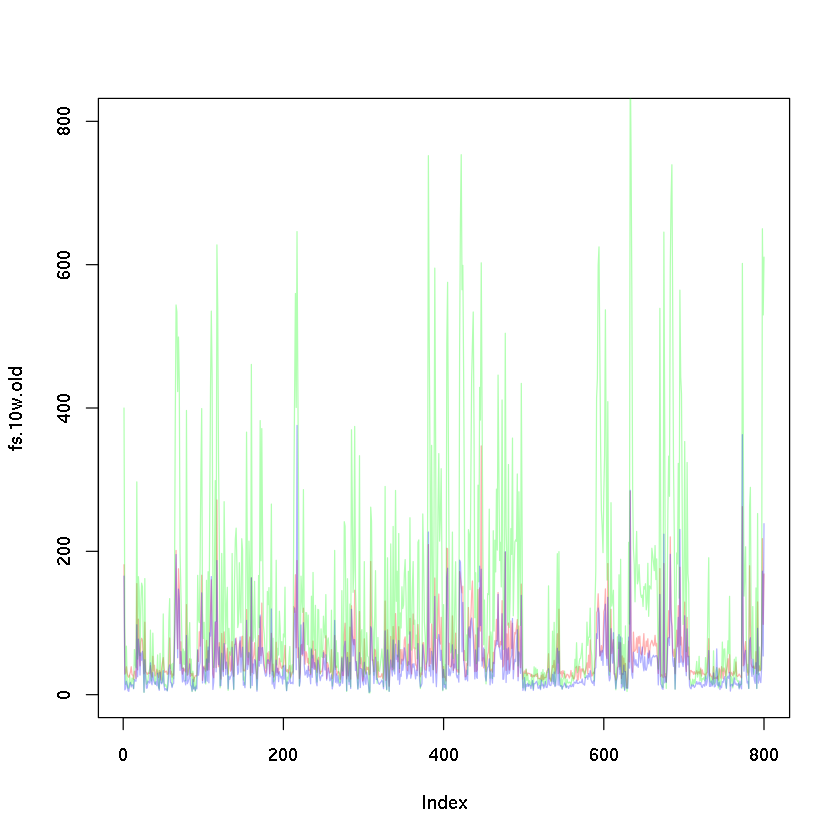

In [73]:
plot(fs.10w.old, t="l", ylim=c(0, 800), col=rgb(1,0,0,0.3))
lines(fs.10w, t="l", ylim=c(0, 800), col=rgb(0,1,0,0.3))
lines(fl.10w, t="l", ylim=c(0, 800), col=rgb(0,0,1,0.3))

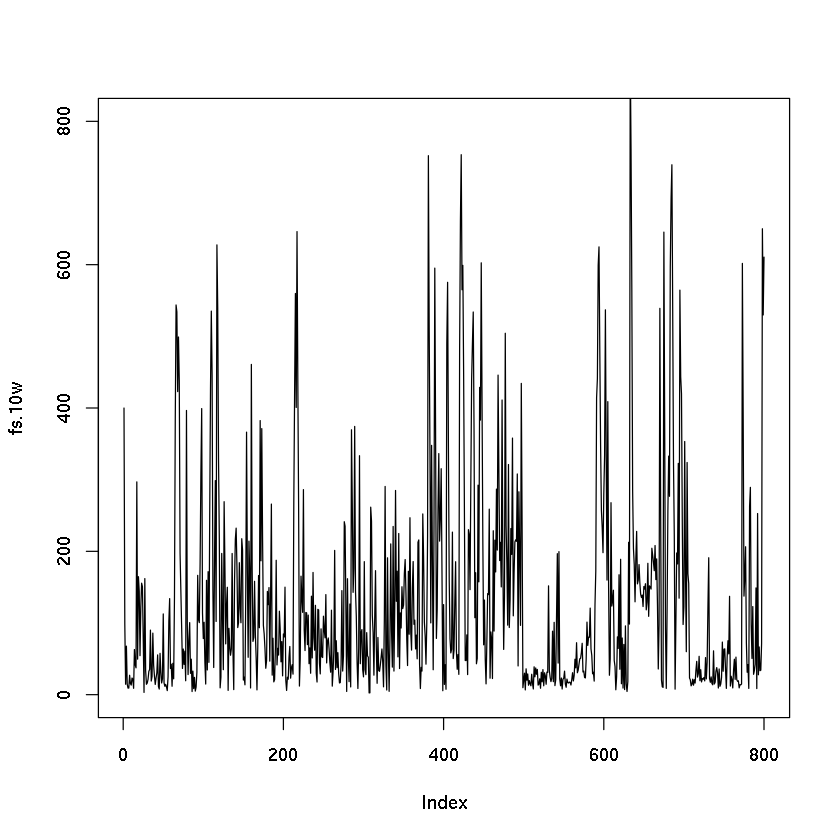

In [70]:
plot(fs.10w, t="l", ylim=c(0, 800))

In [56]:
quntiles.1000 <- seq(1, length(fl.10w)) / length(fl.10w)

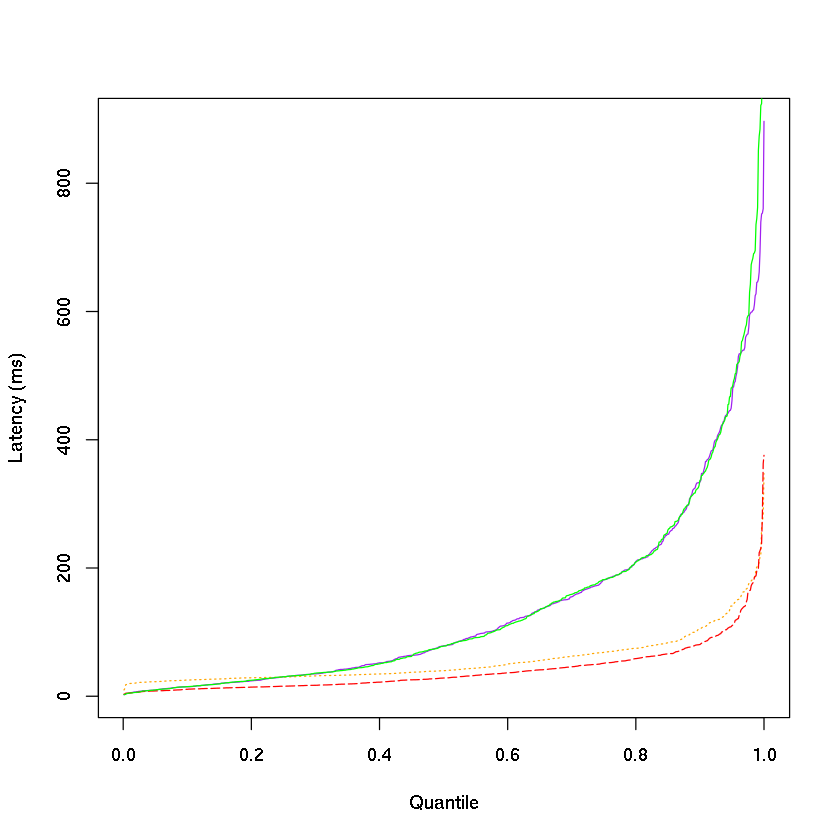

In [60]:
plot(quntiles.1000, sort(fs.10w.1), type = "l", col = "purple",  xlab = "Quantile", ylab = "Latency (ms)", lty=1)
lines(quntiles.1000, sort(fs.10w.old), col = "orange", lty=3)
lines(quntiles.1000, sort(fl.10w), col = "red", lty=5)
lines(quntiles.1000, sort(fs.10w.hb), col = "green", lty=1)

In [40]:
bars <- function(a, b) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- c("FlameStream", "Flink")
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

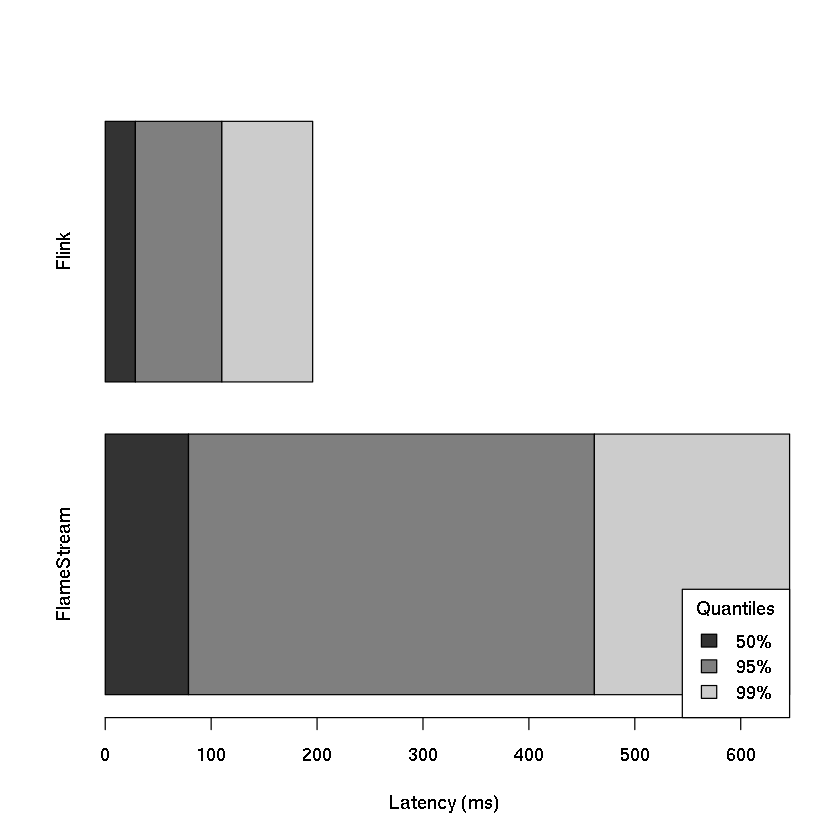

In [42]:
bars(fs.10w, fl.10w)